In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 

import os 
import numpy as np

In [5]:
pd.options.mode.chained_assignment = None

chunk = pd.read_csv("emails.csv", chunksize=5000)
data = next(chunk)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
file       5000 non-null object
message    5000 non-null object
dtypes: object(2)
memory usage: 78.2+ KB


In [6]:
data.to_csv("small_email.csv", index=False)

In [7]:
print(data.iloc[16,1])

Message-ID: <19773657.1075855687649.JavaMail.evans@thyme>
Date: Wed, 4 Oct 2000 09:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Var, Reporting and Resources Meeting
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

---------------------- Forwarded by Phillip K Allen/HOU/ECT on 10/04/2000 
04:23 PM ---------------------------
   
	Enron North America Corp.
	
	From:  Airam Arteaga                           10/04/2000 12:23 PM
	

To: Phillip K Allen/HOU/ECT@ECT, Thomas A Martin/HOU/ECT@ECT, Scott 
Neal/HOU/ECT@ECT, John Arnold/HOU/ECT@ECT, Grant Masson/HOU/ECT@ECT, Ted 
Murphy/HOU/ECT@ECT, Vladimir Gorny/HOU/ECT@ECT, Frank Hayden/Corp/Enron@Enron
cc: Rita Hennessy/NA/Enron@Enron, Ina Rangel/HOU/ECT@ECT, Laura 
Harder/Corp/Enron@Enron, Kimberly Brown/HOU/ECT

Premier essai pour enlever les forwarded : 

In [36]:
t = data.iloc[16,1].split("\n")
k = False
c = 0
s = t.copy()
for i,line in enumerate(t) : 
    if "Forwarded by" in line : 
        k = True
    if k : 
        del s[i-c]
        c+=1
    if "Subject: " in line : 
        print("yes", i, line)
        k = False
 
    
t = s

yes 4 Subject: Var, Reporting and Resources Meeting
yes 30 Subject: Var, Reporting and Resources Meeting


In [37]:
print('\n'.join(t))

Message-ID: <19773657.1075855687649.JavaMail.evans@thyme>
Date: Wed, 4 Oct 2000 09:23:00 -0700 (PDT)
From: phillip.allen@enron.com
To: ina.rangel@enron.com
Subject: Var, Reporting and Resources Meeting
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Ina Rangel
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf


Please plan to attend the below  Meeting:


                                Topic:  Var, Reporting and Resources Meeting
        
  Date:  Wednesday, October 11th

  Time:  2:30 - 3:30 

  Location: EB30C1

  

 If you have any questions/conflicts, please feel free to call me.

Thanks,
Rain
x.31560









### Premier clean vraiment rapide 

In [4]:
data["Date"] = data.message.str.split("\n").str[1].str.split("Date: ").str.join('')
data.Date = pd.to_datetime(data.Date)
data["From"] = data.message.str.split("\n").str[2].str.split("From: ").str.join('')
data["To"] = data.message.str.split("\n").str[3].str.split("To: ").str.join('')
data["Subject"] = data.message.str.split("\n").str[4].str.split("Subject: ").str.join('')

In [5]:
data.message = data.message.str.split("\n").str[15:].str.join('\n').str.lower()
for i,message in enumerate(data.message) :
    if "Forwarded by" in message : 
        data.message[i] = "\n".join(message.split("\n")[9:]).strip()
        
data.message = data.message.str.replace("\n", ' ').str.strip()

In [6]:
data

,file,message,Date,From,To,Subject
0,allen-p/_sent_mail/1.,here is our forecast,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,
1,allen-p/_sent_mail/10.,traveling to have a business meeting takes the...,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:
2,allen-p/_sent_mail/100.,test successful. way to go!!!,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test
3,allen-p/_sent_mail/1000.,"randy, can you send me a schedule of the sal...",2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,
4,allen-p/_sent_mail/1001.,let's shoot for tuesday at 11:45.,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
...,...,...,...,...,...,...
495,allen-p/_sent_mail/549.,"patti, this sounds like an opportunity to lan...",2001-01-25 04:49:00-08:00,phillip.allen@enron.com,patti.sullivan@enron.com,Analyst Interviews Needed - 2/15/01
496,allen-p/_sent_mail/55.,i would support matt lenhart's promotion to th...,2000-12-06 04:43:00-08:00,phillip.allen@enron.com,andrea.richards@enron.com,Re: Associates & Analysts Eligible for Promotion
497,allen-p/_sent_mail/550.,"nick, there is a specific program that we are...",2001-01-25 04:45:00-08:00,phillip.allen@enron.com,nick.politis@enron.com,Re: Resume
498,allen-p/_sent_mail/551.,---------------------- forwarded by phillip k ...,2001-01-25 04:39:00-08:00,phillip.allen@enron.com,pallen70@hotmail.com,Kidventure Camp


En première approche : 
- virer les forward et voir leur proportion
- comment traiter les reply et les forwarded ? 
- Rajouter forwarded ou pas ? 


### Cleaning message : 

On enlève les stopwords, la ponctuation, on tokenize, on lemmatize 

In [8]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer  
from tokenize import tokenize
from string import punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = stopwords.words("english")
stopwords.append("") # rajouter des stopwords ???? 

[nltk_data] Downloading package stopwords to /home/kevin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kevin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
def remove_punctuation(data) : 
    for punc in punctuation :
        data.message = data.message.str.replace("\\d", '')
        data.message = data.message.str.replace(punc,'')
    return data
data = remove_punctuation(data)
#Regarde pour la ponctuation si utile ou pas

In [10]:
def tokenize(data) : 
    data.message = data.message.str.split(" ")
    return data

data = tokenize(data)

In [11]:
def remove_stop_words (data) : 
    for i,message in enumerate(data.message) :
        
        data["message"][i] = [word for word in message if word not in stopwords]
        
    return data

data = remove_stop_words(data)

In [12]:
lemmatizer = WordNetLemmatizer() # A comparer stemming 
def lem_words (data) :
    for i,message in enumerate(data.message) :
        for k, word in enumerate(message) :
            message[k] = lemmatizer.lemmatize(word)
        data["message"][i] = message
    return data
data = lem_words(data)

In [13]:
def get_back_to_text(data) : 
    data.message = data.message.str.join(" ")
    return data 

data = get_back_to_text(data)

In [14]:
data

,file,message,Date,From,To,Subject
0,allen-p/_sent_mail/1.,forecast,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,
1,allen-p/_sent_mail/10.,traveling business meeting take fun trip espec...,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:
2,allen-p/_sent_mail/100.,test successful way go,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test
3,allen-p/_sent_mail/1000.,randy send schedule salary level everyone sche...,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,
4,allen-p/_sent_mail/1001.,let shoot tuesday,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello
...,...,...,...,...,...,...
495,allen-p/_sent_mail/549.,patti sound like opportunity land couple analy...,2001-01-25 04:49:00-08:00,phillip.allen@enron.com,patti.sullivan@enron.com,Analyst Interviews Needed - 2/15/01
496,allen-p/_sent_mail/55.,would support matt lenharts promotion next lev...,2000-12-06 04:43:00-08:00,phillip.allen@enron.com,andrea.richards@enron.com,Re: Associates & Analysts Eligible for Promotion
497,allen-p/_sent_mail/550.,nick specific program using recruit train ment...,2001-01-25 04:45:00-08:00,phillip.allen@enron.com,nick.politis@enron.com,Re: Resume
498,allen-p/_sent_mail/551.,forwarded phillip k allenhouect pm \tenron nor...,2001-01-25 04:39:00-08:00,phillip.allen@enron.com,pallen70@hotmail.com,Kidventure Camp


### Next step : Vectorize 

On peut travailler avec les messages comme cela, ce n'est pas un clean parfait bien évidemment mais c'ets déjà une bonne base de travail

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [19]:
vectorizer = TfidfVectorizer(min_df=10)
wordvector_fit = vectorizer.fit_transform(data.message)
feature_names = vectorizer.get_feature_names()
dense = wordvector_fit.todense()


In [183]:
l = np.array(data.message)

In [105]:
N = 4
clf = KMeans(n_clusters=N, 
            max_iter=50, 
            init='k-means++',
            n_init=4)
labels = clf.fit_predict(wordvector_fit)

In [106]:
wordvector_fit_2d = dense
pca = PCA(n_components=2).fit(wordvector_fit_2d)
datapoint = pca.transform(wordvector_fit_2d)

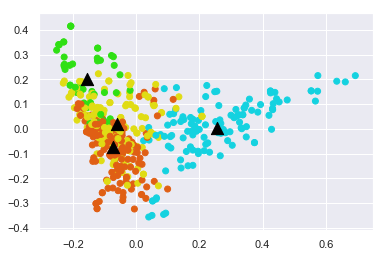

In [107]:
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0"]
color = [label[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1],c  = color)

centroids = clf.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [117]:
cluster0 = wordvector_fit[labels==0]

In [118]:
df = pd.DataFrame(data = cluster0.todense(), columns = feature_names)

In [119]:
df.head()

,able,access,account,across,actual,add,addition,additional,address,afternoon,...,without,work,working,would,xfilename,xorigin,year,yes,yesterday,yet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
l = sum(cluster0.todense())

In [128]:
occurences = l[0][0]

In [130]:
*sorted(zip(np.array(l)[0], feature_names))

In [144]:
z =zip(np.array(l)[0], feature_names)

In [155]:
t = [list(el) for el in sorted(zip(np.array(l)[0], feature_names), reverse=True)]

In [157]:
t2 = sorted(zip(np.array(l)[0], feature_names), reverse=True)

'phillip'